39丨数据挖掘实战（1）：信用卡违约率分析
====
今天我来带你做一个数据挖掘的项目。在数据挖掘的过程中，我们经常会遇到一些问题，比如：**如何选择各种分类器**，到底选择哪个分类算法，是 SVM，决策树，还是 KNN？如何优化分类器的参数，以便得到更好的分类准确率？

这两个问题，是数据挖掘核心的问题。当然对于一个新的项目，我们还有其他的问题需要了解，比如掌握**数据探索和数据可视化**的方式，还需要对数据的完整性和质量做评估。这些内容我在之前的课程中都有讲到过。

今天的学习主要围绕下面的三个目标，并通过它们完成信用卡违约率项目的实战，这三个目标分别是：
1. 创建各种分类器，包括已经掌握的 SVM、决策树、KNN 分类器，以及随机森林分类器；
2. 掌握 GridSearchCV 工具，优化算法模型的参数；
3. 使用 Pipeline 管道机制进行**流水线作业**。因为在做分类之前，我们还需要一些准备过程，比如数据规范化，或者数据降维等。

构建随机森林分类器
====
在算法篇中，我主要讲了数据挖掘十大经典算法。实际工作中，你也可能会用到随机森林。

随机森林的英文是 Random Forest，英文简写是 RF。它实际上是一个包含**多个决策树的分类器**，每一个子分类器都是一棵 **CART 分类回归树**。所以随机森林既可以做分类，又可以做回归。当它做分类的时候，输出结果是每个子分类器的**分类结果中最多**的那个。你可以理解是**每个分类器都做投票**，取投票最多的那个结果。当它做回归的时候，输出结果是每棵 CART 树的**回归结果的平均值**。

在 sklearn 中，我们使用 RandomForestClassifier() 构造随机森林模型，函数里有一些常用的构造参数：
<img src="./images/38-05.png">
当我们创建好之后，就可以使用 fit 函数拟合，使用 predict 函数预测。

使用 GridSearchCV 工具对模型参数进行调优
====
在做分类算法的时候，我们需要经常调节**网络参数**（对应上面的构造参数），目的是得到**更好的分类结果**。实际上一个分类算法有很多参数，取值范围也比较广，那么该如何调优呢？

Python 给我们提供了一个很好用的工具 GridSearchCV，它是 Python 的**参数自动搜索模块**。我们只要告诉它想要调优的参数有哪些以及参数的取值范围，它就会把所有的情况都跑一遍，然后告诉我们哪个参数是最优的，结果如何。

使用 GridSearchCV 模块需要先引用工具包，方法如下：
```python
from sklearn.model_selection import GridSearchCV
```
然后我们使用 GridSearchCV(estimator, param_grid, cv=None, scoring=None) 构造参数的**自动搜索**模块，这里有一些主要的参数需要说明下：
<img src="./images/38-06.png">
构造完 GridSearchCV 之后，我们就可以使用 fit 函数拟合训练，使用 predict 函数预测，这时预测采用的是**最优参数**情况下的分类器。

这里举一个简单的例子，我们用 sklearn 自带的 IRIS 数据集，采用随机森林对 IRIS 数据分类。假设我们想知道 n_estimators 在 1-10 的范围内取哪个值的分类结果最好，可以编写代码：
```python
# -*- coding: utf-8 -*-
# 使用RandomForest对IRIS数据集进行分类
# 利用GridSearchCV寻找最优参数
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
rf = RandomForestClassifier()
parameters = {"n_estimators": range(1,11)}
iris = load_iris()
# 使用GridSearchCV进行参数调优
clf = GridSearchCV(estimator=rf, param_grid=parameters)
# 对iris数据集进行分类
clf.fit(iris.data, iris.target)
print("最优分数： %.4lf" %clf.best_score_)
print("最优参数：", clf.best_params_)
```
运行结果如下：
```python
最优分数： 0.9667
最优参数： {'n_estimators': 6}
```
你能看到当我们采用随机森林作为分类器的时候，**最优准确率**是 0.9667，当 n_estimators=6 的时候，是最优参数，也就是随机森林一共有 **6 个子决策树**。

使用 Pipeline 管道机制进行流水线作业
====
做分类的时候往往都是有步骤的，比如先对数据进行**规范化处理**，你也可以用 PCA 方法（一种常用的降维方法）对数据降维，最后使用分类器分类。

Python 有一种 Pipeline 管道机制。管道机制就是让我们**把每一步都按顺序列下来**，从而创建 Pipeline 流水线作业。每一步都采用 **(‘名称’, 步骤)** 的方式来表示。

我们需要先采用 StandardScaler 方法对数据**规范化**，即采用数据规范化为均值为 0，方差为 1 的正态分布，然后采用 PCA 方法对数据进行降维，最后采用随机森林进行分类。具体代码如下：
```python
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA()),
        ('randomforestclassifier', RandomForestClassifier())
])
```
那么我们现在采用 Pipeline 管道机制，用随机森林对 **IRIS 数据集**做一下分类。先用 StandardScaler 方法对数据**规范化**，然后再用随机森林分类，编写代码如下：
```python
# -*- coding: utf-8 -*-
# 使用RandomForest对IRIS数据集进行分类
# 利用GridSearchCV寻找最优参数,使用Pipeline进行流水作业
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
rf = RandomForestClassifier()
parameters = {"randomforestclassifier__n_estimators": range(1,11)}
iris = load_iris()
pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('randomforestclassifier', rf)
])
# 使用GridSearchCV进行参数调优
clf = GridSearchCV(estimator=pipeline, param_grid=parameters)
# 对iris数据集进行分类
clf.fit(iris.data, iris.target)
print("最优分数： %.4lf" %clf.best_score_)
print("最优参数：", clf.best_params_)
```
运行结果：
```python
最优分数： 0.9667
最优参数： {'randomforestclassifier__n_estimators': 9}
```
你能看到是否采用**数据规范化**对结果还是有一些影响的，有了 GridSearchCV 和 Pipeline 这两个工具之后，我们在使用分类器的时候就会方便很多。

对信用卡违约率进行分析
====
我们现在来做一个信用卡违约率的项目，这个数据集你可以从 GitHub 上下载：https://github.com/cystanford/credit_default。

这个数据集是台湾某银行 2005 年 4 月到 9 月的信用卡数据，数据集一共包括 25 个字段，具体含义如下：
<img src="./images/39-01.jpg">
现在我们的目标是要针对这个数据集构建一个分析信用卡违约率的分类器。具体选择哪个分类器，以及分类器的参数如何优化，我们可以用 GridSearchCV 这个工具跑一遍。

先梳理下整个项目的流程：
<img src="./images/39-02.jpg">
1. 加载数据；
2. 准备阶段：探索数据，采用数据可视化方式可以让我们对数据有更直观的了解，比如我们想要了解信用卡违约率和不违约率的人数。因为数据集没有专门的测试集，我们还需要使用 train_test_split 划分数据集。
3. 分类阶段：之所以把数据规范化放到这个阶段，是因为我们可以使用 Pipeline 管道机制，将数据规范化设置为第一步，分类为第二步。因为我们不知道采用哪个分类器效果好，所以我们需要多用几个分类器，比如 SVM、决策树、随机森林和 KNN。然后通过 GridSearchCV 工具，找到每个分类器的最优参数和最优分数，最终找到最适合这个项目的分类器和该分类器的参数。

基于上面的流程，具体代码如下：
```python
# -*- coding: utf-8 -*-
# 信用卡违约率分析
import pandas as pd
from sklearn.model_selection import learning_curve, train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns
# 数据加载
data = data = pd.read_csv('./UCI_Credit_Card.csv')
# 数据探索
print(data.shape) # 查看数据集大小
print(data.describe()) # 数据集概览
# 查看下一个月违约率的情况
next_month = data['default.payment.next.month'].value_counts()
print(next_month)
df = pd.DataFrame({'default.payment.next.month': next_month.index,'values': next_month.values})
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.figure(figsize = (6,6))
plt.title('信用卡违约率客户\n (违约：1，守约：0)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()
# 特征选择，去掉ID字段、最后一个结果字段即可
data.drop(['ID'], inplace=True, axis =1) #ID这个字段没有用
target = data['default.payment.next.month'].values
columns = data.columns.tolist()
columns.remove('default.payment.next.month')
features = data[columns].values
# 30%作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.30, stratify = target, random_state = 1)
    
# 构造各种分类器
classifiers = [
    SVC(random_state = 1, kernel = 'rbf'),    
    DecisionTreeClassifier(random_state = 1, criterion = 'gini'),
    RandomForestClassifier(random_state = 1, criterion = 'gini'),
    KNeighborsClassifier(metric = 'minkowski'),
]
# 分类器名称
classifier_names = [
            'svc', 
            'decisiontreeclassifier',
            'randomforestclassifier',
            'kneighborsclassifier',
]
# 分类器参数
classifier_param_grid = [
            {'svc__C':[1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':[3,5,6]} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
]
 
# 对具体的分类器进行GridSearchCV参数调优
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score = 'accuracy'):
    response = {}
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, scoring = score)
    # 寻找最优的参数 和最优的准确率分数
    search = gridsearch.fit(train_x, train_y)
    print("GridSearch最优参数：", search.best_params_)
    print("GridSearch最优分数： %0.4lf" %search.best_score_)
  predict_y = gridsearch.predict(test_x)
    print("准确率 %0.4lf" %accuracy_score(test_y, predict_y))
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y,predict_y)
    return response
 
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')
```
从结果中，我们能看到 SVM 分类器的准确率最高，测试准确率为 0.8172。

在决策树分类中，我设置了 3 种最大深度，当最大深度 =6 时结果最优，测试准确率为 0.8113；在随机森林分类中，我设置了 3 个决策树个数的取值，取值为 6 时结果最优，测试准确率为 0.7994；在 KNN 分类中，我设置了 3 个 n 的取值，取值为 8 时结果最优，测试准确率为 0.8036。

总结
====
今天我给你讲了随机森林的概念及工具的使用，另外针对数据挖掘算法中经常采用的参数调优，也介绍了 GridSearchCV 工具这个利器。并将这两者结合起来，在信用卡违约分析这个项目中进行了使用。

很多时候，我们不知道该采用哪种分类算法更适合。即便是对于一种分类算法，也有很多参数可以调优，每个参数都有一定的取值范围。我们可以把想要采用的分类器，以及这些参数的取值范围都设置到数组里，然后使用 GridSearchCV 工具进行调优。
<img src="./images/39-03.png">

今天我们讲了如何使用 GridSearchCV 做参数调优，你可以说说你的理解，如果有使用的经验也可以分享下。

另外针对信用卡违约率分析这个项目，我们使用了 SVM、决策树、随机森林和 KNN 分类器，你能不能编写代码使用 AdaBoost 分类器做分类呢？其中 n_estimators 的取值有 10、50、100 三种可能，你可以使用 GridSearchCV 运行看看最优参数是多少，测试准确率是多少？

(30000, 25)
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904  

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
d:\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36829 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32422 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_t

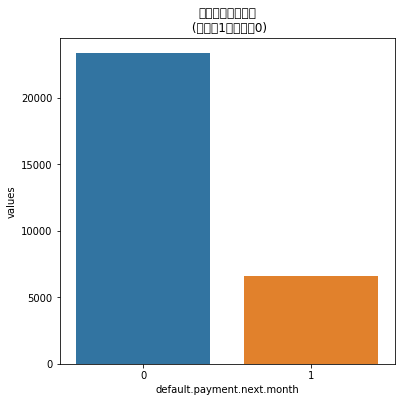

GridSearch最优参数： {'svc__C': 1, 'svc__gamma': 0.01}
GridSearch最优分数： 0.8186
准确率 0.8172
GridSearch最优参数： {'decisiontreeclassifier__max_depth': 6}
GridSearch最优分数： 0.8208
准确率 0.8113
GridSearch最优参数： {'randomforestclassifier__n_estimators': 6}
GridSearch最优分数： 0.8004
准确率 0.7994
GridSearch最优参数： {'kneighborsclassifier__n_neighbors': 8}
GridSearch最优分数： 0.8039
准确率 0.8036


In [3]:

# -*- coding: utf-8 -*-
# 信用卡违约率分析
import pandas as pd
from sklearn.model_selection import learning_curve, train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns

# 数据加载
data = pd.read_csv('./credit_default-master/UCI_Credit_Card.csv')
# 数据探索
print(data.shape) # 查看数据集大小
print(data.describe()) # 数据集概览

# 查看下一个月违约率的情况
next_month = data['default.payment.next.month'].value_counts()
print(next_month)

df = pd.DataFrame({'default.payment.next.month': next_month.index,'values': next_month.values})
plt.rcParams['font.sans-serif']=['SimSun'] #用来正常显示中文标签
plt.figure(figsize = (6,6))
plt.title('信用卡违约率客户\n (违约：1，守约：0)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()


# 特征选择，去掉ID字段、最后一个结果字段即可
data.drop(['ID'], inplace=True, axis =1) #ID这个字段没有用
target = data['default.payment.next.month'].values

columns = data.columns.tolist() #轉成list
columns.remove('default.payment.next.month')
features = data[columns].values

# 30%作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.30, stratify = target, random_state = 1)
    
# 构造各种分类器
classifiers = [
    SVC(random_state = 1, kernel = 'rbf'),    
    DecisionTreeClassifier(random_state = 1, criterion = 'gini'),
    RandomForestClassifier(random_state = 1, criterion = 'gini'),
    KNeighborsClassifier(metric = 'minkowski'),
]
# 分类器名称
classifier_names = [
            'svc', 
            'decisiontreeclassifier',
            'randomforestclassifier',
            'kneighborsclassifier',
]
# 分类器参数
classifier_param_grid = [
            {'svc__C':[1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':[3,5,6]} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
]
 
# 对具体的分类器进行GridSearchCV参数调优
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score = 'accuracy'):
    response = {}
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, scoring = score)
    # 寻找最优的参数 和最优的准确率分数
    search = gridsearch.fit(train_x, train_y)
    print("GridSearch最优参数：", search.best_params_)
    print("GridSearch最优分数： %0.4lf" %search.best_score_)
    
    predict_y = gridsearch.predict(test_x)
    print("准确率 %0.4lf" %accuracy_score(test_y, predict_y))
    
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y,predict_y)
    return response
 
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')

In [5]:
data = pd.read_csv('./credit_default-master/UCI_Credit_Card.csv')
next_month = data['default.payment.next.month'].value_counts()
print(next_month)
"""
輸出結果index為0, 1
0    23364
1     6636
"""


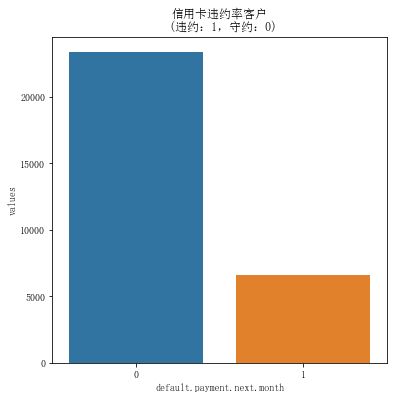

In [20]:
df = pd.DataFrame({'default.payment.next.month': next_month.index,'values': next_month.values})
plt.rcParams['font.sans-serif']=['SimSun'] #用来正常显示中文标签
plt.figure(figsize = (6,6))
plt.title('信用卡违约率客户\n (违约：1，守约：0)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

In [2]:
import matplotlib.font_manager
a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
 
for i in a:
    print(i)

.Aqua Kana
.Arabic UI Display
.Arabic UI Text
.Keyboard
.New York
.New York
.SF Compact
.SF Compact
.SF Compact Rounded
.SF NS Mono
.SF NS Mono
.SF NS Rounded
Academy Engraved LET
Al Bayan
Al Nile
Al Tarikh
American Typewriter
Andale Mono
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Chancery
Apple SD Gothic Neo
Apple Symbols
AppleGothic
AppleMyungjo
Arial
Arial
Arial
Arial
Arial Black
Arial Hebrew
Arial Narrow
Arial Narrow
Arial Narrow
Arial Narrow
Arial Rounded MT Bold
Arial Unicode MS
Arial Unicode MS
Athelas
Avenir
Avenir Next
Avenir Next Condensed
Ayuthaya
Baghdad
Bangla MN
Bangla Sangam MN
Baskerville
Beirut
Big Caslon
Bodoni 72
Bodoni 72 Oldstyle
Bodoni 72 Smallcaps
Bodoni Ornaments
Bradley Hand
Brush Script MT
Chalkboard
Chalkboard SE
Chalkduster
Charter
Cochin
Comic Sans MS
Comic Sans MS
Copperplate
Corsiva Hebrew
Courier New
Courier New
Courier New
Courier New
DIN Alternate
DIN Condensed
Damascus
DecoType Naskh
DejaVu Sans
DejaVu Sans
DejaVu Sans

In [1]:
import matplotlib
print(matplotlib.__file__)

/Users/yuyu/PythonProject/venv/lib/python3.7/site-packages/matplotlib/__init__.py


In [21]:
# 特征选择，去掉ID字段、最后一个结果字段即可
data.drop(['ID'], inplace=True, axis =1) #ID这个字段没有用
target = data['default.payment.next.month'].values

columns = data.columns.tolist()
columns.remove('default.payment.next.month')
features = data[columns].values

In [25]:
target

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [26]:
result

{'predict_y': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'accuracy_score': 0.8035555555555556}